In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
all_xray_df = pd.read_csv('project_data/classifcation_data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('project_data', 'classifcation_data', 'images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(20)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
105176,00028222_000.png,No Finding,0,28222,21,F,PA,2992,2991,0.143,0.143,NaN,project_data/classifcation_data/images_012/ima...
80692,00019823_009.png,No Finding,9,19823,30,M,AP,3056,2544,0.139,0.139,NaN,project_data/classifcation_data/images_009/ima...
63998,00015799_012.png,Cardiomegaly|Infiltration,12,15799,68,F,AP,2500,2048,0.168,0.168,NaN,project_data/classifcation_data/images_007/ima...
109838,00029878_001.png,No Finding,1,29878,20,F,AP,3056,2544,0.139,0.139,NaN,project_data/classifcation_data/images_012/ima...
59863,00014784_003.png,No Finding,3,14784,28,M,PA,2992,2991,0.143,0.143,NaN,project_data/classifcation_data/images_007/ima...
2581,00000667_000.png,No Finding,0,667,50,M,PA,2594,2991,0.143,0.143,NaN,project_data/classifcation_data/images_001/ima...
98563,00026057_002.png,Mass|Pleural_Thickening,2,26057,63,M,PA,2992,2991,0.143,0.143,NaN,project_data/classifcation_data/images_011/ima...
54533,00013670_040.png,Consolidation,40,13670,56,M,AP,2500,2048,0.168,0.168,NaN,project_data/classifcation_data/images_006/ima...
34306,00009012_006.png,Atelectasis,6,9012,54,F,AP,2500,2048,0.168,0.168,NaN,project_data/classifcation_data/images_004/ima...
15624,00004096_001.png,Pleural_Thickening,1,4096,19,F,PA,2048,2500,0.171,0.171,NaN,project_data/classifcation_data/images_003/ima...


In [3]:
new_df = all_xray_df[[not '|' in x for x in all_xray_df['Finding Labels']]]
new_df = new_df[new_df['Finding Labels'] != "No Finding"]
new_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
38069,00010001_001.png,Atelectasis,1,10001,48,F,PA,2500,2048,0.168,0.168,NaN,project_data/classifcation_data/images_005/ima...
98581,00026066_000.png,Infiltration,0,26066,24,M,PA,2992,2991,0.143,0.143,NaN,project_data/classifcation_data/images_011/ima...
36448,00009608_044.png,Infiltration,44,9608,30,M,AP,2500,2048,0.168,0.168,NaN,project_data/classifcation_data/images_005/ima...
103492,00027621_006.png,Atelectasis,6,27621,57,M,AP,3056,2544,0.139,0.139,NaN,project_data/classifcation_data/images_011/ima...
16685,00004470_006.png,Atelectasis,6,4470,37,F,AP,2500,2048,0.168,0.168,NaN,project_data/classifcation_data/images_003/ima...
12847,00003369_014.png,Infiltration,14,3369,50,F,AP,2500,2048,0.168,0.168,NaN,project_data/classifcation_data/images_002/ima...
23699,00006271_030.png,Infiltration,30,6271,40,M,AP,2500,2048,0.171,0.171,NaN,project_data/classifcation_data/images_003/ima...
24453,00006434_001.png,Infiltration,1,6434,39,M,AP,2500,2048,0.171,0.171,NaN,project_data/classifcation_data/images_003/ima...
32225,00008435_003.png,Nodule,3,8435,56,F,PA,2500,2048,0.168,0.168,NaN,project_data/classifcation_data/images_004/ima...
43947,00011344_002.png,Atelectasis,2,11344,62,F,AP,2500,2048,0.168,0.168,NaN,project_data/classifcation_data/images_005/ima...


In [10]:
MIN_CASES = 1000

from itertools import chain
all_labels = np.unique(list(chain(*new_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        new_df[c_label] = new_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

all_labels = [c_label for c_label in all_labels if new_df[c_label].sum()>MIN_CASES]

new_df= new_df[new_df['Finding Labels'].isin(all_labels)]

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


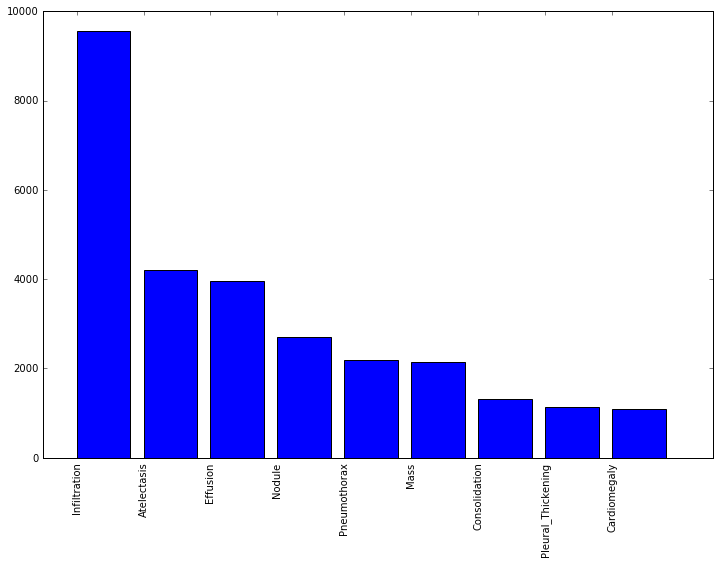

In [11]:
label_counts = new_df['Finding Labels'].value_counts()
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

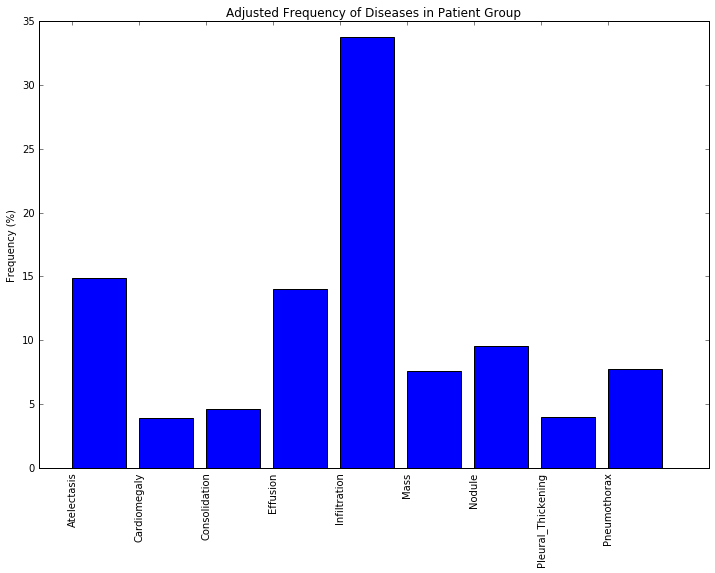

In [12]:
label_counts = 100*np.mean(new_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [13]:
print(len(new_df.index))

28284


In [38]:
import shutil
from skimage.io import imsave, imread
os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed'))
for label in all_labels:
    os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/'+label))
    os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/'+label+'/train'))
    os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/'+label+'/test'))
    os.mkdir(os.path.join('/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/'+label+'/val'))
    numTest = int(.15*len(new_df[label].index))
    numVal = int(.15*len(new_df[label].index)) + numTest
    for i, row in new_df[new_df['Finding Labels'] == label].iterrows():
        #source_image = imread(row['path'])
        if i < numTest:
            shutil.copyfile(row['path'],'/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/'+label+'/test/'+row["Image Index"])
            continue
        if i < numVal:
            shutil.copyfile(row['path'], '/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/'+label+'/val/'+row["Image Index"])
            continue
        else:
            shutil.copyfile(row['path'],'/home/nasheath_ahmed/X-RayShadowRemovalAndClassification/project_data/classificationProcessed/'+label+'/train/'+row["Image Index"])
